In [41]:
import cv2
import os
import numpy as np
import json
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import keras
from PIL import Image

2023-03-26 14:20:44.346811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model credit to: "https://medium.com/dataseries/detecting-ships-in-satellite-imagery-7f0ca04e7964". 

In [3]:
image = cv2.imread("/Users/peterlayne/Downloads/archive (9)/scenes/scenes/lb_1.png")

In [4]:
print(type(image))

<class 'numpy.ndarray'>


In [33]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        # img= cv2.cvtColor(((cv2.imread(os.path.join(folder,filename))), cv2.COLOR_BGR2RGB))
        img= cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images


In [34]:
noships= load_images_from_folder("/Users/peterlayne/DS-4002/Ships_Data/no-ship")
ships= load_images_from_folder("/Users/peterlayne/DS-4002/Ships_Data/ship")

noships= np.asarray(noships)
ships= np.asarray(ships)



In [52]:
newinput= np.concatenate((noships, ships), axis=0)
newinput.shape

(4000, 80, 80, 3)

In [36]:
outputno= np.asarray([0] * 3000)
outputyes= np.asarray([1] * 1000)

In [51]:
newoutput= np.concatenate((outputno, outputyes), axis= None)

In [38]:
newinput.shape

(4000, 80, 80, 3)

In [39]:

#If there is an issue its here
n_spectrum = 3 # the number of color chanels: RGB 
weight = 80
height = 80
X = newinput.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [30]:
pic = X[3]
red_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectrum = pic[2]

In [42]:
y = np_utils.to_categorical(newoutput, 2)

In [53]:

indexes = np.arange(4000)
np.random.shuffle(indexes)
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]
X_train = X_train / 255 

TypeError: 'int' object is not subscriptable

In [44]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD

np.random.seed(42)
  # network design

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))
model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [45]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])
  # training
model.fit(
    X_train, 
    y_train,
    batch_size=32, # 32 photos at once
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Epoch 1/18
100/100 - 48s - loss: 0.5517 - accuracy: 0.7494 - val_loss: 0.5070 - val_accuracy: 0.7400 - 48s/epoch - 479ms/step
Epoch 2/18
100/100 - 32s - loss: 0.4886 - accuracy: 0.7778 - val_loss: 0.3458 - val_accuracy: 0.8462 - 32s/epoch - 317ms/step
Epoch 3/18
100/100 - 33s - loss: 0.3442 - accuracy: 0.8481 - val_loss: 0.2928 - val_accuracy: 0.8900 - 33s/epoch - 329ms/step
Epoch 4/18
100/100 - 26s - loss: 0.3037 - accuracy: 0.8622 - val_loss: 0.2656 - val_accuracy: 0.8838 - 26s/epoch - 257ms/step
Epoch 5/18
100/100 - 25s - loss: 0.2704 - accuracy: 0.8853 - val_loss: 0.2215 - val_accuracy: 0.9062 - 25s/epoch - 248ms/step
Epoch 6/18
100/100 - 26s - loss: 0.2393 - accuracy: 0.9034 - val_loss: 0.2095 - val_accuracy: 0.9262 - 26s/epoch - 258ms/step
Epoch 7/18
100/100 - 35s - loss: 0.2190 - accuracy: 0.9084 - val_loss: 0.2302 - val_accuracy: 0.9225 - 35s/epoch - 349ms/step
Epoch 8/18
100/100 - 30s - loss: 0.2114 - accuracy: 0.9203 - val_loss: 0.1516 - val_accuracy: 0.9400 - 30s/epoch - 297

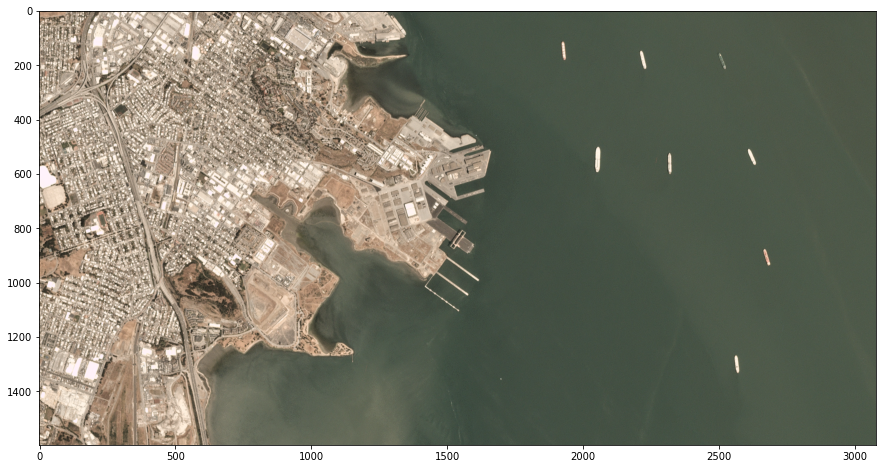

In [46]:
image = Image.open(r'/Users/peterlayne/Downloads/archive (9)/scenes/scenes/sfbay_2.png')
pix = image.load()
n_spectrum = 3
width = image.size[0]
height = image.size[1]
  # creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)
plt.figure(1, figsize = (15, 30))
plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)
plt.show()

In [47]:
picture_tensor = picture_tensor.transpose(2,0,1)
  # Search on the image
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
         if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
             result = False
    return result
    
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

In [48]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

1/1 [==============================] - 0s 128ms/step


KeyboardInterrupt: 

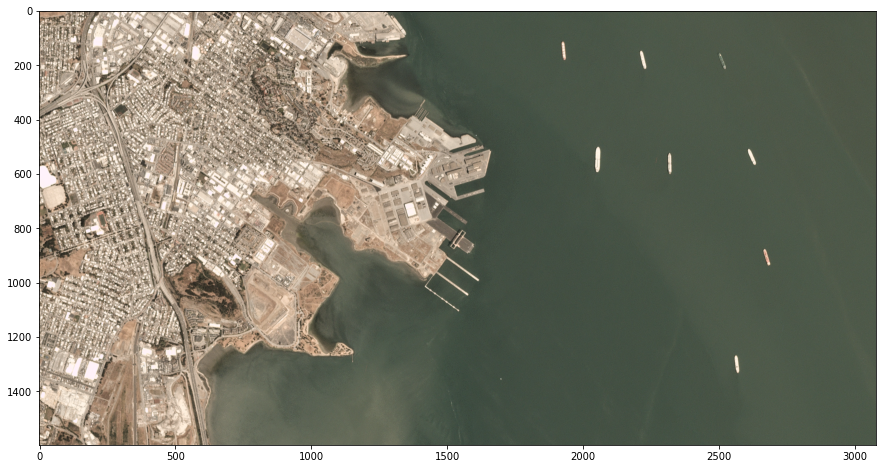

In [49]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape
(1777, 2825, 3)
plt.figure(1, figsize = (15, 30))
plt.subplot(3,1,1)
plt.imshow(picture_tensor)
plt.show()